In [ ]:
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib as mpl
from matplotlib import pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_2 = pd.read_csv("/content/drive/MyDrive/Organizacion De Datos/Trabajo_practico/dengue_features_train.csv")
df_3 = pd.read_csv("/content/drive/MyDrive/Organizacion De Datos/Trabajo_practico/dengue_labels_train.csv")
nuevo_df = pd.merge(df_2, df_3, how= "inner")

In [ ]:
nuevo_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [ ]:
nuevo_df.corr()["total_cases"].nlargest(8,"all")

<ipython-input-165-7b0ad900367b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  nuevo_df.corr()["total_cases"].nlargest(8,"all")


total_cases                              1.000000
reanalysis_min_air_temp_k                0.325252
station_min_temp_c                       0.267109
reanalysis_air_temp_k                    0.264952
weekofyear                               0.216452
reanalysis_avg_temp_k                    0.151637
reanalysis_dew_point_temp_k              0.142531
reanalysis_specific_humidity_g_per_kg    0.129861
Name: total_cases, dtype: float64

In [ ]:
#nuevo_df = nuevo_df[nuevo_df["year"]>= 2004]

In [ ]:
nuevo_df['reanalysis_min_air_temp_k'] = (nuevo_df['reanalysis_min_air_temp_k'] -273).round()

In [ ]:
agrupado = nuevo_df.groupby(["year","reanalysis_min_air_temp_k"]).agg({"total_cases":["sum"]})

In [ ]:
agrupado

total_cases
                                       sum
year reanalysis_min_air_temp_k            
1990 22.0                               27
     23.0                               82
     24.0                              262
     25.0                              124
     26.0                              371
...                                    ...
2010 19.0                               14
     20.0                               22
     21.0                               42
     22.0                              116
     23.0                               23

[175 rows x 1 columns]

In [ ]:
agrupado = agrupado.reset_index() 

In [ ]:
agrupado.columns=["year","reanalysis_min_air_temp_k","casos"]

In [ ]:
matriz = agrupado.pivot_table(values = 'casos', index = "reanalysis_min_air_temp_k", columns="year").fillna(0)

In [ ]:
#matriz

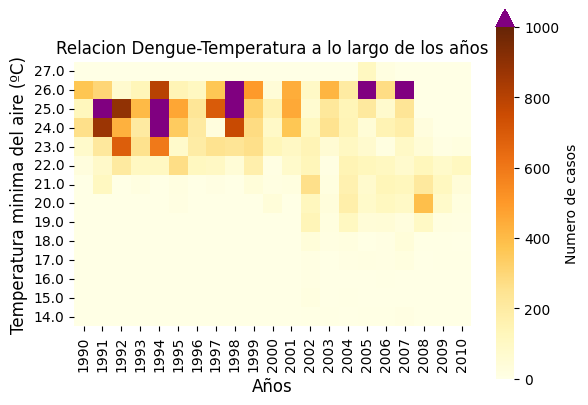

In [ ]:
cmap =sns.color_palette("YlOrBr", as_cmap=True)
cmap.set_over('purple')
ax = sns.heatmap(matriz,square=True,vmax=1000,cbar_kws={'label': 'Numero de casos','extend': 'max'},cmap=cmap)

plt.title("Relacion Dengue-Temperatura a lo largo de los años")
plt.xlabel('Años', fontsize = 12)
plt.ylabel('Temperatura minima del aire (ºC)', fontsize = 12) 
ax.invert_yaxis()
# el original es con reanalysis_air_temp_k